### Rule-Based Classification

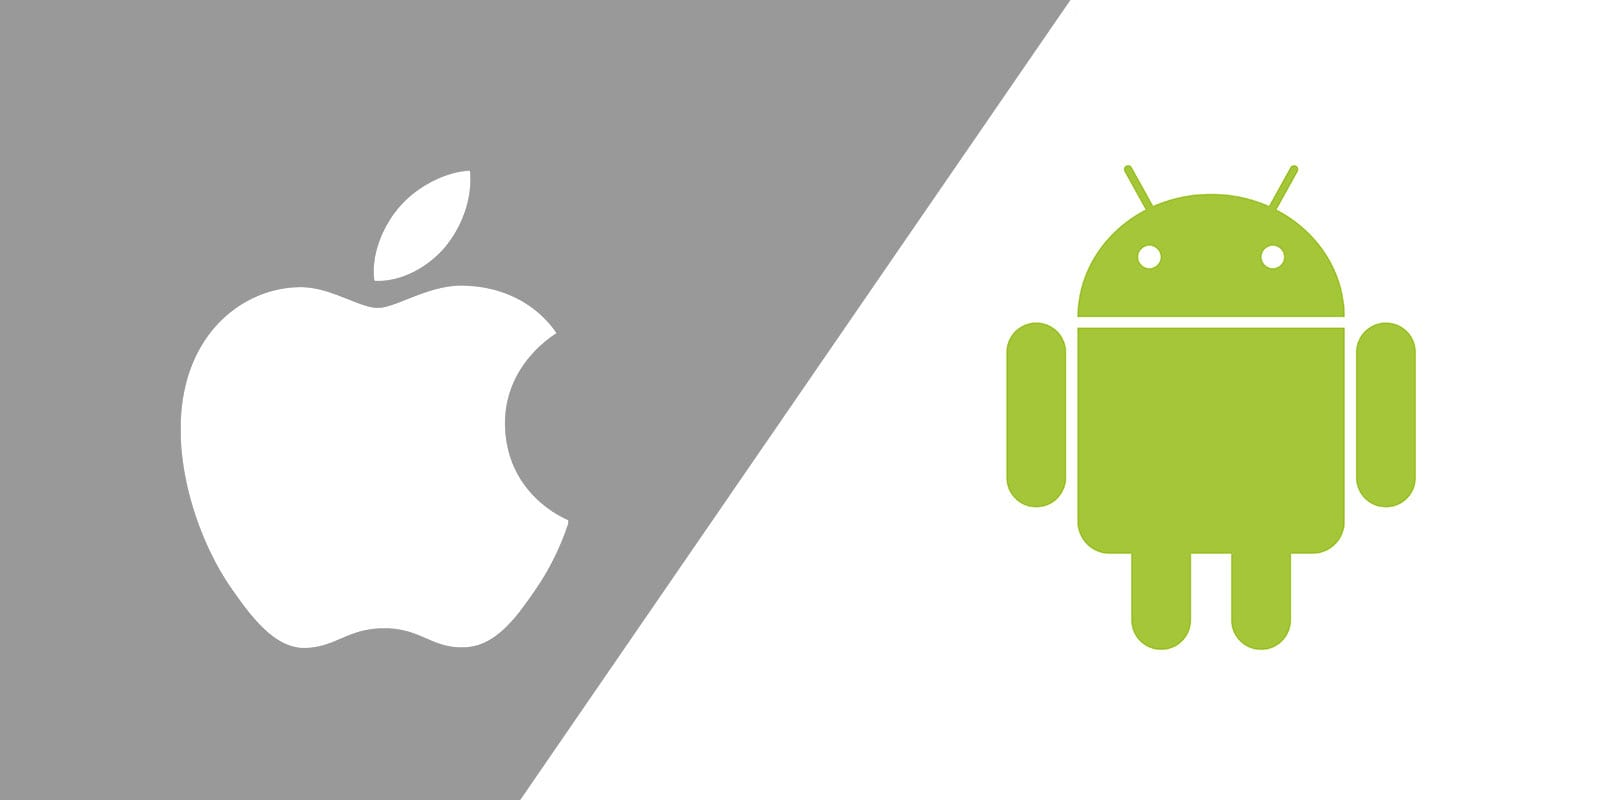

 - The aim is to create level-based customer definitions by using some features in the history of a game company and to create segments according to these new customer definitions and to estimate how much new development information can be brought to the company on acerage according to these segments.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("persona.csv")

In [4]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


- Both head and tail parts of dataset is printed properly.

In [6]:
df.tail()

,PRICE,SOURCE,SEX,COUNTRY,AGE
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31
4999,29,android,female,bra,31


- There are no missing values in dataset.
- All features are corrected data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


- In describe we can see only numeric values' statistics informations.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


1. How many unique "Source"s are there? What are their frequencies?

In [10]:
df["SOURCE"].unique()

array(['android', 'ios'], dtype=object)

In [11]:
df["SOURCE"].value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

2. How many unique "Price"s are there?

In [12]:
df.PRICE.nunique()

6

### There are 6 different package options for this company.

In [15]:
df.PRICE.unique()

array([39, 49, 29, 19, 59,  9], dtype=int64)

**3. How many sales were made from which PRICE?**

In [16]:
df["PRICE"].value_counts()

PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

## We can see that, lowest priced option sold more from the highest priced option.

**4. How many sales were made from which country?**

In [18]:
df["COUNTRY"].value_counts()

COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

**5. How much was earned from sales in total by country?**

In [19]:
df.groupby("COUNTRY").agg({"PRICE":"sum"})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [20]:
df.groupby("COUNTRY")["PRICE"].sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

**6. What are the sales number by Source types?**

In [21]:
df["SOURCE"].value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

**7. What are the Price averages by country?**

In [22]:
df.groupby("COUNTRY").agg({"PRICE":"mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


**8. What are the averages of money spent according to sources?**

In [23]:
df.groupby("SOURCE").agg({"PRICE":"mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


### It seems like all sources are pricing same in the average level.
- It might be little bit tricky. 
- We can check in country level to see behind the scenes.

In [24]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

**Fraction is not so different in country part.**

**9. What are the PRICE averages in the COUNTRY-SOURCE breakdown?**

In [25]:
df.groupby(["COUNTRY","SOURCE","SEX", "AGE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

**It migt not be shown us clear view but now we have all PRICE aggregation for feature based.**

In [26]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX", "AGE"]).agg({"PRICE":"mean"})

## For better understanding, we can sort this aggregation for Price level.

In [27]:
agg_df.sort_values("PRICE", ascending = False)

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

In [28]:
len(agg_df.columns)

1

- We have one columns because we groupped the df. 
- If we want to turn back the with this grouped version to 5 feature df format again we should reset the indexes.

In [29]:
agg_df = agg_df.reset_index()

In [30]:
agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE'], dtype='object')

In [31]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897


- If we want to make rule based classification we need to downgrade number of unique values for some columns.
- In this example, AGE has so many unique values because of its nature.
- We can downgrade it by changing it to object format and making ranges for some age intervals.

### What are the ranges we will determine for the age variable?

In [32]:
bins = [0, 18, 23, 30, 40, agg_df['AGE'].max()]

### What are the class names we will determime for the age variable?

In [33]:
labels = ["0_18", "19_23", "24_30", "31_40", "41_" + str(agg_df['AGE'].max())]

In [34]:
## labels = ["0_18", "19_23", "24_30", "31_40", f"41_{agg_df['AGE'].max()}"]

- There are 2 functions for making new classes; pd.cut and pd.qcut.
- pd.cut = if we are going to make intervals before.
- pd.qcut = we can define intervals inside the function.

In [35]:
pd.cut(agg_df["AGE"], bins = bins, labels = labels)

0       0_18
1       0_18
2       0_18
3       0_18
4      19_23
       ...  
343    41_66
344    41_66
345    41_66
346    41_66
347    41_66
Name: AGE, Length: 348, dtype: category
Categories (5, object): ['0_18' < '19_23' < '24_30' < '31_40' < '41_66']

In [36]:
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], bins = bins, labels = labels)

In [37]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,female,15,38.714286,0_18
1,bra,android,female,16,35.944444,0_18
2,bra,android,female,17,35.666667,0_18
3,bra,android,female,18,32.255814,0_18
4,bra,android,female,19,35.206897,19_23


### Right now we have low unique classed age variable and we need to define customers with other variables too.
- For this reason, we need to create new column called "customers_level_based".
- From beginning to here, in every iteration we are grouping the dataset part by part. In the final view, sample size will be downgraded max 100-110 rows.

In [38]:
agg_df.drop(["AGE", "PRICE"], axis = 1)

,COUNTRY,SOURCE,SEX,AGE_CAT
0,bra,android,female,0_18
1,bra,android,female,0_18
2,bra,android,female,0_18
3,bra,android,female,0_18
4,bra,android,female,19_23
...,...,...,...,...
343,usa,ios,male,41_66
344,usa,ios,male,41_66
345,usa,ios,male,41_66
346,usa,ios,male,41_66


In [39]:
agg_df.drop(["AGE", "PRICE"], axis = 1).values

array([['bra', 'android', 'female', '0_18'],
       ['bra', 'android', 'female', '0_18'],
       ['bra', 'android', 'female', '0_18'],
       ...,
       ['usa', 'ios', 'male', '41_66'],
       ['usa', 'ios', 'male', '41_66'],
       ['usa', 'ios', 'male', '41_66']], dtype=object)

- At this stage, we need to meet .join method.
- If we have a list like A, B, C, D and if we are goin to use --> '-'.join(list) method, our list will be look like this --> A-B-C-D
- This method is proper to use for this problem.

In [41]:
["_".join(i).upper() for i in agg_df.drop(["AGE", "PRICE"], axis = 1).values]

['BRA_ANDROID_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_19_23',
 'BRA_ANDROID_FEMALE_19_23',
 'BRA_ANDROID_FEMALE_19_23',
 'BRA_ANDROID_FEMALE_19_23',
 'BRA_ANDROID_FEMALE_19_23',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_24_30',
 'BRA_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_ANDROID_MALE_0_18',
 'BRA_ANDROID_MALE_0_18',
 'BRA_ANDROID_MALE_0_18',
 'BRA_ANDROID_MALE_0_18',
 'BRA_ANDROID_MALE_19_23',
 'BRA_ANDROID_MALE_19_23',
 'BRA_ANDROID_MALE_19_23',
 'BRA_ANDROID_MALE_19_23',
 'BRA_ANDROID_MALE_19_23',
 'BRA_ANDRO

In [42]:
agg_df["CUSTOMER_LEVEL_BASED"] = ["_".join(i).upper() for i in agg_df.drop(["AGE", "PRICE"], axis = 1).values]

In [43]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,CUSTOMER_LEVEL_BASED
0,bra,android,female,15,38.714286,0_18,BRA_ANDROID_FEMALE_0_18
1,bra,android,female,16,35.944444,0_18,BRA_ANDROID_FEMALE_0_18
2,bra,android,female,17,35.666667,0_18,BRA_ANDROID_FEMALE_0_18
3,bra,android,female,18,32.255814,0_18,BRA_ANDROID_FEMALE_0_18
4,bra,android,female,19,35.206897,19_23,BRA_ANDROID_FEMALE_19_23


### Here we are, it is looking all proper for the formatting. Also, we need to drop unnecessary columns.

In [44]:
agg_df = agg_df[["CUSTOMER_LEVEL_BASED", "PRICE"]]

In [45]:
agg_df.head()

,CUSTOMER_LEVEL_BASED,PRICE
0,BRA_ANDROID_FEMALE_0_18,38.714286
1,BRA_ANDROID_FEMALE_0_18,35.944444
2,BRA_ANDROID_FEMALE_0_18,35.666667
3,BRA_ANDROID_FEMALE_0_18,32.255814
4,BRA_ANDROID_FEMALE_19_23,35.206897


- ### If we look carefully, we can see that there are one or two last steps needed.
- ### There are some rows, which are the same and we need to aggregate them one more time.
- ### As I mentioned it before, we need to turn back to dataframe format again, so we can get some help from reset_index().

In [46]:
agg_df.groupby("CUSTOMER_LEVEL_BASED")["PRICE"].mean()

CUSTOMER_LEVEL_BASED
BRA_ANDROID_FEMALE_0_18     35.645303
BRA_ANDROID_FEMALE_19_23    34.077340
BRA_ANDROID_FEMALE_24_30    33.863946
BRA_ANDROID_FEMALE_31_40    34.898326
BRA_ANDROID_FEMALE_41_66    36.737179
                              ...    
USA_IOS_MALE_0_18           33.983495
USA_IOS_MALE_19_23          34.901872
USA_IOS_MALE_24_30          34.838143
USA_IOS_MALE_31_40          36.206324
USA_IOS_MALE_41_66          35.750000
Name: PRICE, Length: 109, dtype: float64

In [47]:
agg_df = agg_df.groupby("CUSTOMER_LEVEL_BASED")["PRICE"].mean().reset_index()

In [48]:
agg_df.head()

,CUSTOMER_LEVEL_BASED,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


### For the last step, there are segments, which needs to be mentioned because we had our customer types, but we don't know its price's segmentation.
### Let's create some segmentation.

In [50]:
pd.qcut(agg_df["PRICE"], q = 4, labels = ["D", "C", "B", "A"])

0      B
1      C
2      C
3      B
4      A
      ..
104    C
105    B
106    B
107    A
108    B
Name: PRICE, Length: 109, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [51]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], q = 4, labels = ["D", "C", "B", "A"])

In [52]:
agg_df.head()

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A


In [53]:
agg_df.groupby("SEGMENT").agg({"PRICE": "mean"})

,PRICE
SEGMENT,
D,29.206780
C,33.509674
B,34.999645
A,38.691234


In [54]:
agg_df.groupby("SEGMENT").agg({"PRICE": ["mean","sum","min","max"]})

PRICE                                   
              mean          sum        min        max
SEGMENT                                              
D        29.206780   817.789833  19.000000  32.333333
C        33.509674   904.761209  32.500000  34.077340
B        34.999645   944.990411  34.103727  36.000000
A        38.691234  1044.663328  36.060606  45.428571

In [55]:
agg_df.shape

(109, 3)

## Now we have segments and we have its infos.
- Lets try it out for some example scenarios

**- To which segment does a 33-year-old Turkish woman using ANDROID belong?**
- How much income is she expected to earn on average?

In [56]:
new_user = "TUR_ANDROID_FEMALE_31_40"

In [58]:
agg_df[agg_df['CUSTOMER_LEVEL_BASED'] == new_user]

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


## This user is top segment, which is A. 


**- To which segment does a 35-year-old French woman using IOS belong?**
- How much income is she expected to earn on average?

In [59]:
new_user1 = "FRA_IOS_FEMALE_31_40"

In [60]:
agg_df[agg_df["CUSTOMER_LEVEL_BASED"] == new_user1]

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C


## This user is average segment, which is C.